Course  :   SIF3012 Computational Physics <br>
Session :   2024/2025 Semester 1 <br>

Name        :   Muhammad Haziq Haqimi bin Hamran <br>
Matric No.  :   U2004573/1 <br>

---

### One-Dimensional Schrodinger Equation and its Energy Eigenvalue 

**Introduction**: <br>
This Jupyter notebook focuses on
1. solving the one-dimensional Schrodinger equation for bound states in a potential well, and
2. finding the energy eigenvalue for a given quantum state.

This notebook demonstrates numerical integration, eigenvalue matching, and validation against the analytical solution provided in the assignment.

**Schrodinger equation**: <br>
The time-independent one-dimensional Schrodinger equation is given by

\begin{align}
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x) \psi(x) &= E \psi(x) \\
\frac{d^2 \psi(x)}{dx^2} + \frac{2m}{\hbar^2}\left[E - V(x)\right] \psi(x) &= 0
\end{align}

where $V(x)$ is the potential well, $\psi(x)$ is the wavefunction, and $E$ is the energy eigenvalue.

**Numerical methods**: <br>
1. **Numerov method** is a finite diffence scheme that solve second-order differentiation equations in which the first-order term is absent.
2. **Bisection method** is a root-finding scheme that refine the eigenvalue until the mathcing condition is satisfied to the predefine tolerence.

**Boundary conditions**: <br>
1. The wavefunction $\psi(x)$ must satisfy the boundary conditions $\psi(x) \to 0$ as $|x| \to \infty$.
2. Integration is carried out from both the left and right sides of the potential well, and the solutions are matched at a midpoint (turning point).
3. The matching condition ensures continuity of the wavefunction and its derivative, which is key to determining the correct eigenvalue $E$.

**Matching condition**: <br>
To evaluate the matching condition, the algorithm numerically computes the wavefunction on both sides and compares their values at a midpoint or boundary. This is essentially a numerical evaluation of the continuity requirement for $\psi(x)$

**Iterative refinement**: <br>
The eigenvalue problem is solved iteratively by adjusting $E$ until the wavefunctions satisfy the matching condition and the predefined tolerance.

**Grid discretization**: <br>
The algorithm discretizes the spatial domain $x$ into a grid of points. The accuracy depends on the resolution of this grid, the number of points and step size $h$.

---

**1. Import Libraries** <br>
Start by importing the necessary libraries for numerical computation and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**2. Define Constants and Potential Function** <br>
The given potential well is defined as:

$\displaystyle{
    V(x) = 
    \frac{\hbar^2}{2m}
    \alpha^2 \lambda (\lambda - 1)
    \left(
        \frac{1}{2} - \frac{1}{\cosh^2(\alpha x)}
    \right)
}$,

where $\alpha = 1$, $\lambda = 4$, $\hbar = 1$, and $m = 1$.

**Programme implementation**:
- Declare the constants `hbar`, `m`, `alpha` and `lambda_`.
- The function `V(x)` implements the potential well, which defines the energy boundary for the particle.
- Plot `V(x)` against `x` to determine the suitable energy range for finding eigenvalue(s).


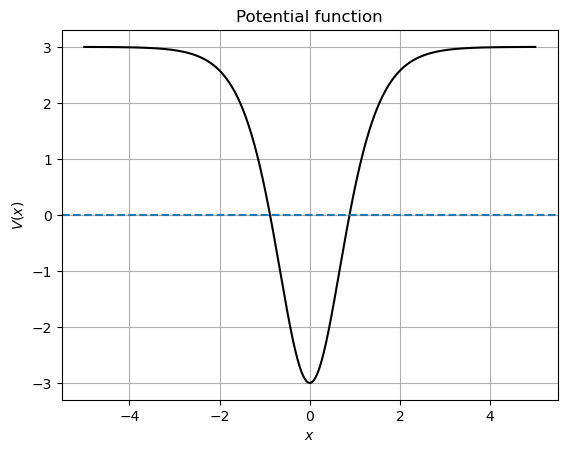

In [2]:
# Constants
hbar = 1        # Reduced Planck constant
m = 1           # Particle mass
alpha = 1       # Alpha parameter
lambda_ = 4     # Lambda parameter

# Potential function
def V(x):
    return (hbar**2 / (2 * m)) * alpha**2 * lambda_ * (lambda_ - 1) * (0.5 - 1 / np.cosh(alpha * x)**2)

x = np.linspace(-5, 5, 1000)
plt.plot(x, V(x), 'k-')
plt.axhline(0, linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.title('Potential function')
plt.grid()
plt.show()


**3. Analytical Eigenvalue Function** <br>
The analytical solution for the eigenvalues of this potential is given by:

$\displaystyle{
    E_n = \frac{\hbar^2}{2m} \alpha^2 \left[ \frac{\lambda (\lambda - 1)}{2} - (\lambda - 1 - n)^2 \right]
}$,

where $n = 0, 1, 2, \ldots$.

**Programme implementation**:
- The function `analytical_eigenvalue(n)` computes the exact energy eigenvalue for a given quantum number `n`, which we will use for comparison with the numerical result.

In [3]:
# Analytical eigenvalues
def analytical_eigenvalue(n):
    return (hbar**2 / (2 * m)) * alpha**2 * (
        (lambda_ * (lambda_ - 1)) / 2 - (lambda_ - 1 - n)**2
    )

E_analytical = analytical_eigenvalue(0)
print("The analytical eigenvalue is:", E_analytical)

The analytical eigenvalue is: -1.5


**4. Numerov Method for Solving the Schrodinger Equation** <br>
The Numerov method is used to integrate the Schrodinger equation numerically. It solves for $\psi(x)$ given energy $E$, it is a stable and efficient method for solving second-order differential equations in which the first-order term does not appear.

$\displaystyle{
    \psi_{i+1} \left( 1 + \frac{1}{12} h^2 k_{i+1}  \right)
        = 2 \psi_i \left( 1 - \frac{5}{12} h^2 k_i \right)
        - \psi_{i-1} \left( 1 + \frac{1}{12} h^2 k_{i-1} \right)
}$,
where $k_i = 2[E - V(x_i)]$ and $h = x_{i+1} - x_i$

**Programme implementation**:
- The function `numerov()` integrates the Schrodinger equation for a given energy `E` with stepsize `h`.
- The wavefunction `psi` is calculated interatively in which the recursion relation for `psi` is `psi[i+1]`.

In [4]:
# Numerov method
def numerov(E, x):
    h = x[1] - x[0]  # Step size
    psi = np.zeros_like(x)
    psi[0] = 1e-5  # Small initial value
    psi[1] = 1e-5  # Perturbation to start the iteration
    
    for i in range(1, len(x) - 1):
        k0 = 2 * (E - V(x[i-1]))
        k1 = 2 * (E - V(x[i]))
        k2 = 2 * (E - V(x[i+1]))
        psi[i+1] = ((2 * psi[i] * (1 - (5/12) * h**2 * k1) 
                     - psi[i-1] * (1 + (1/12) * h**2 * k0))
                     / (1 + (1/12) * h**2 * k2))
    return psi


**5. Linear Shooting Method and Matching Condition** <br>
The wavefunction is computed from both sides (left and right), and the solutions are matched at a midpoint to determine the correct eigenvalue.

$
\mathrm{match}(E) = \psi_L (x) - \psi_R (x)
$

**Programme implementation**:
- `linear_shooting(E)` integrates the wavefunction from both sides by employing the `numerov` function.
- `match(E)` checks the difference between the left and right wavefuntion solutions at the boundary. If `match(E) = 0`, then the energy `E` is an eigenvalue.

In [5]:
# Linear shooting method
def linear_shooting(E):
    psi_left = numerov(E, x)
    psi_right = numerov(E, x[::-1])[::-1]
    return psi_left, psi_right

# Matching condition
def match(E):
    psi_left, psi_right = linear_shooting(E)
    return psi_left[-1] - psi_right[-1]

**6. Determine Suitable Energy Range** <br>
To determine the best energy range for finding eigenvalues, we plot the matching function over a broad range and identify regions where it crosses zero.
- `energy_range()` scans the matching function over a given energy range.
- The graph helps to visually identify where the matching function crosses zero, indicating possible eigenvalues.

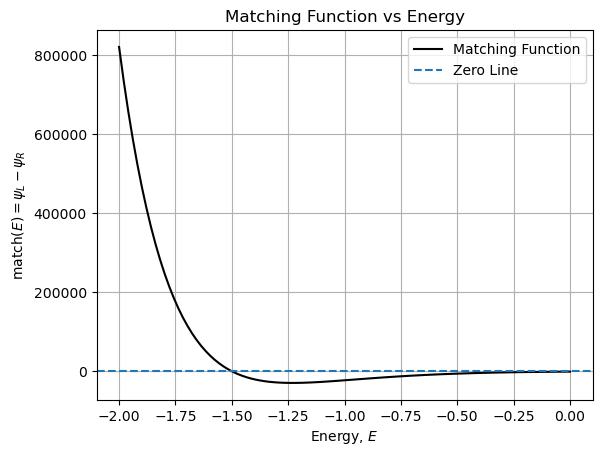

In [6]:
# Plot the matching function over a range
def energy_range(Emin, Emax, n):
    E_vals = np.linspace(Emin, Emax, n)
    match_vals = [match(E) for E in E_vals]
    plt.plot(E_vals, match_vals, 'k-', label='Matching Function')
    plt.axhline(0, linestyle='--', label='Zero Line')
    plt.xlabel('Energy, $E$')
    plt.ylabel('match$(E) = \\psi_L - \\psi_R$')
    plt.title('Matching Function vs Energy')
    plt.legend()
    plt.grid()
    plt.show()
    return E_vals, match_vals

# Find suitable energy range
E_vals, match_vals = energy_range(-2, 0, 100)

**7. Root-Finding with Bisection Method** <br>
Once the energy range is identified, the **bisection method** is computed to refine the eigenvalue.
The bisection method iteratively halves the interval $[a,b]$ containing a root of the function $f(E) = \mathrm{match}(E)$ that changes sign across the root.

**Programme implementation**:
- The function `bisection` finds the root of a function `f` for a given boundary of `a` to `b`.
- The function `f` is evaluated:
    - if `f(c) = 0`, the root is `c`;
    - if `f(a) * f(c) < 0`, the root lies in `[a, c]`, so update `b = c`;
    - if `f(c) * f(b) < 0`, the root lies in `[c, b]`, so update `a = c`.
- The stopping conditions are when the interval width `[b - a]` is smaller than the predefined tolerance `tol` or until `abs(f(c))` is below the set thershold.


In [7]:
# Bisection method for root finding
def bisection_method(f, a, b, tol=1e-9, max_iter=10000):
    if f(a) * f(b) > 0:
        print(f"Converged after {k} iterations with error {abs(b - a)}")
        return (a + b) / 2

    for k in range(max_iter):
        c = (a + b) / 2  # Midpoint

        if abs(f(c)) < tol or (b - a) / 2 < tol:  # Stopping condition
            print(f"Did not converge after {max_iter} iterations")
            return c
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2

# Use bisection to find the eigenvalue after identifying the range
E_root = bisection_method(match, -2, 0)
print("The numerical eigenvalue is:", E_root)

Did not converge after 10000 iterations
The numerical eigenvalue is: -1.5000000009313226


**8. Plot the Final Wavefunction** <br>
Once the eigenvalue is obtained, plot the wavefunction $\psi(x)$ to validate the solution.

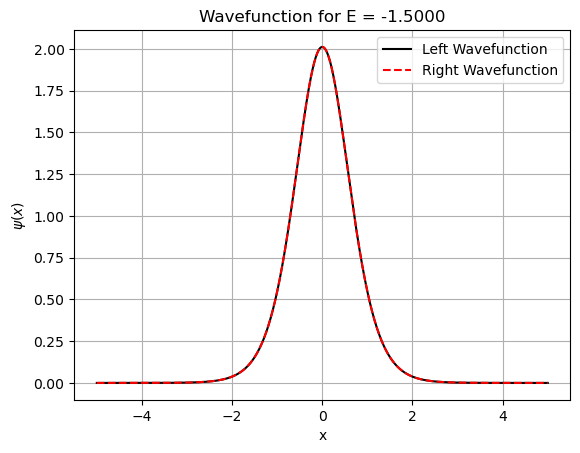

In [8]:
# Plot the wavefunction
psi_left, psi_right = linear_shooting(E_root)
plt.plot(x, psi_left, "k-", label="Left Wavefunction")
plt.plot(x, psi_right, "r--", label="Right Wavefunction")
plt.xlabel("x")
plt.ylabel("$\\psi(x)$")
plt.title("Wavefunction for E = {:.4f}".format(E_root))
plt.legend()
plt.grid()
plt.show()

**9. Verify Results with Analytical Eigenvalue** <br>
Finally, compare the numerical eigenvalue with the analytical solution and check for consistency.

In [9]:
print("The analytical eigenvalue is:", E_analytical)
print("The numerical eigenvalue is:", E_root)

The analytical eigenvalue is: -1.5
The numerical eigenvalue is: -1.5000000009313226
